In [1]:
from src.data_loaders import load_air_passangers_data
from src.visualization import viz_time_series, viz_multiple_time_series, plot_forecast
from src.data_analysis import compute_moving_mean, compute_moving_std, adf_test
from src.fit_classical_methods import auto_arima, auto_sarima, auto_sarimax, forecast
import matplotlib.pyplot as plt

In [2]:
data = load_air_passangers_data()
column_name = "#Passengers"

In [3]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


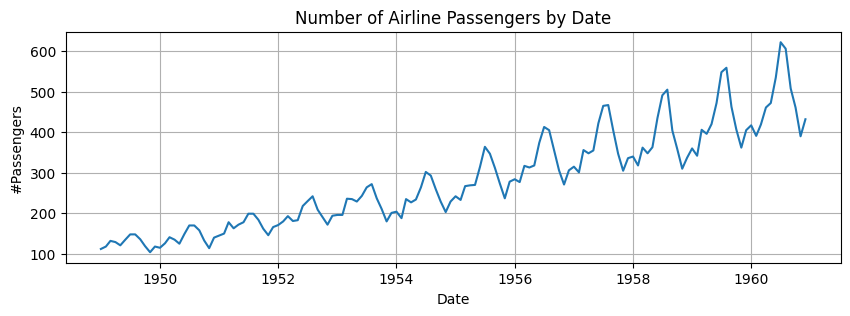

In [4]:
viz_time_series(data=data,
                title="Number of Airline Passengers by Date",
                xlabel="Date",
                ylabel=column_name)

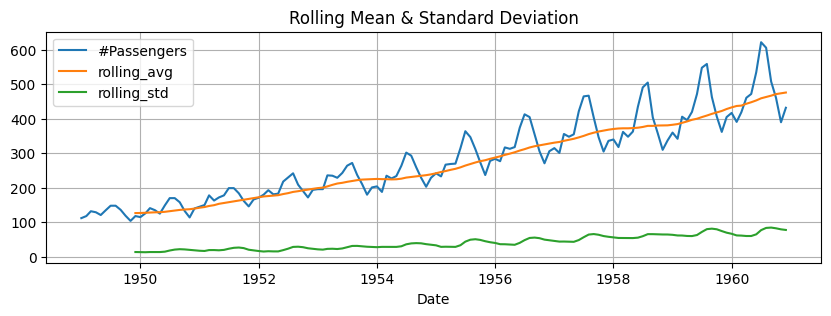

In [5]:
#Determine rolling statistics
data["rolling_avg"] = compute_moving_mean(data=data,
                                          column_name=column_name,
                                          window=12)
data["rolling_std"] = compute_moving_std(data=data,
                                         column_name=column_name,
                                         window=12)

viz_multiple_time_series(data,
                         columns=[column_name, "rolling_avg", "rolling_std"],
                         title='Rolling Mean & Standard Deviation',
                         xlabel='Date')

In [6]:
adf_test(data, column_name)

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64

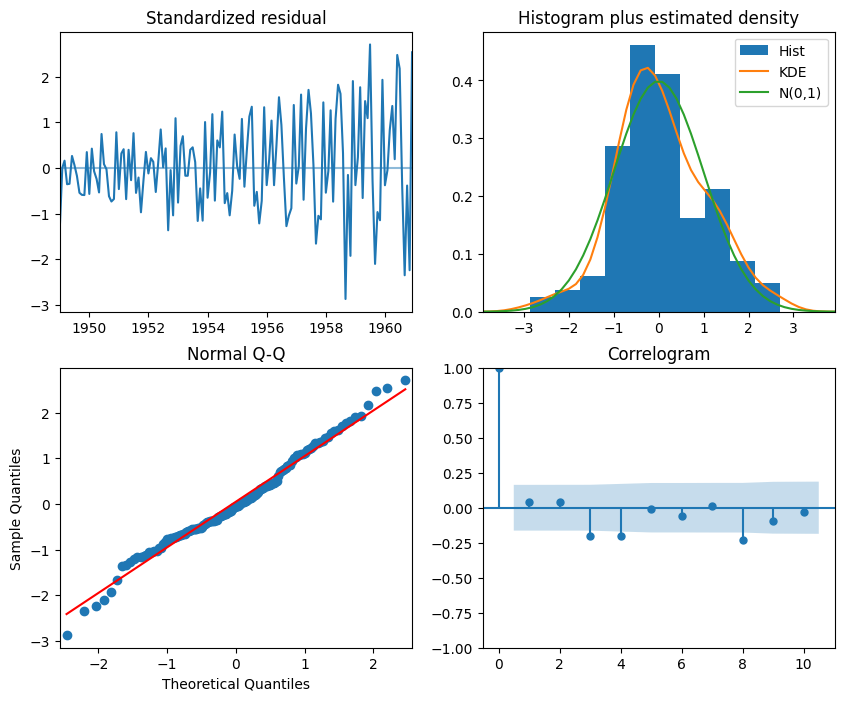

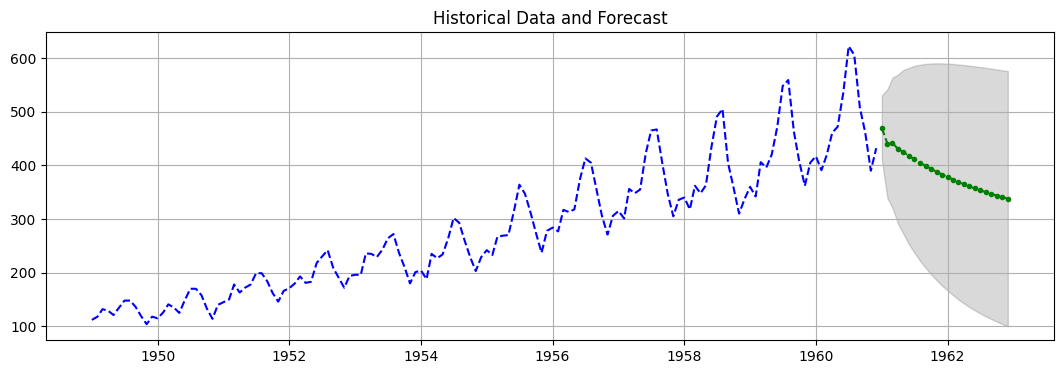

In [7]:
# ARIMA
ARIMA_model = auto_arima(data, column_name)
ARIMA_model.plot_diagnostics(figsize=(10,8));
fitted_series, lower_series, upper_series = forecast(data=data,
                                                     column_name=column_name,
                                                     model=ARIMA_model)
plot_forecast(data, column_name, fitted_series, lower_series, upper_series)


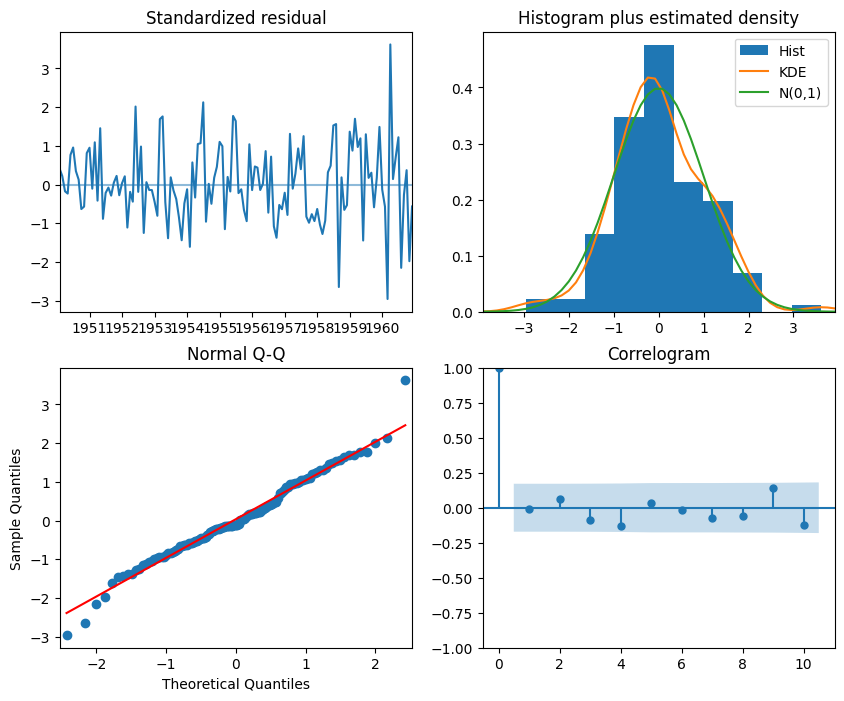

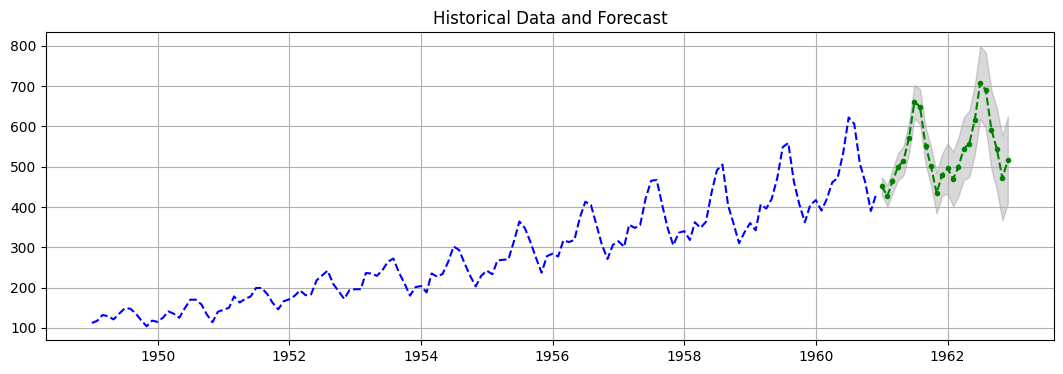

In [8]:
# SARIMA
SARIMA_model = auto_sarima(data, column_name)
SARIMA_model.plot_diagnostics(figsize=(10,8));
fitted_series, lower_series, upper_series = forecast(data=data,
                                                     column_name=column_name,
                                                     model=SARIMA_model)
plot_forecast(data, column_name, fitted_series, lower_series, upper_series)

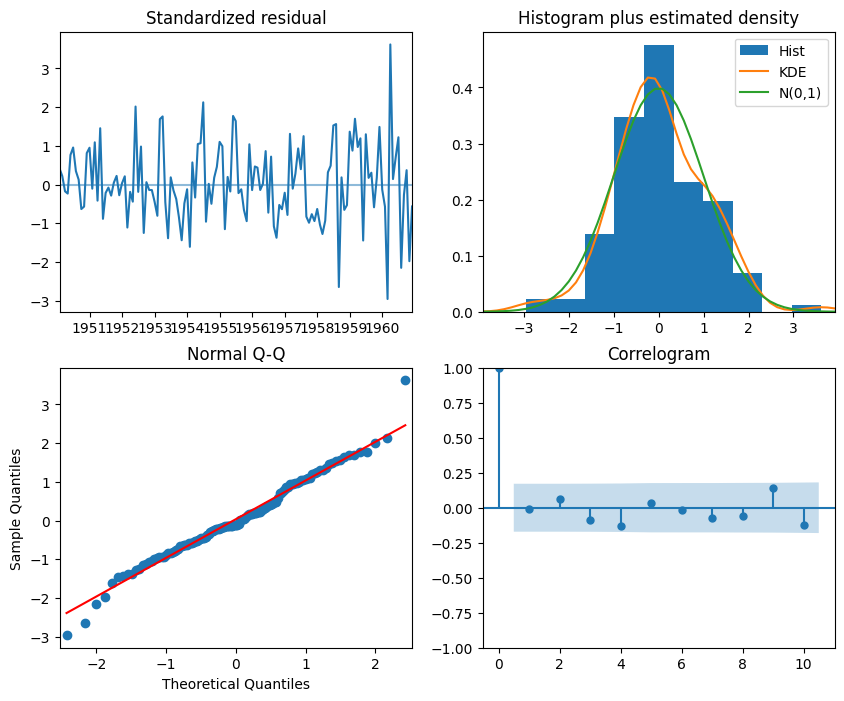

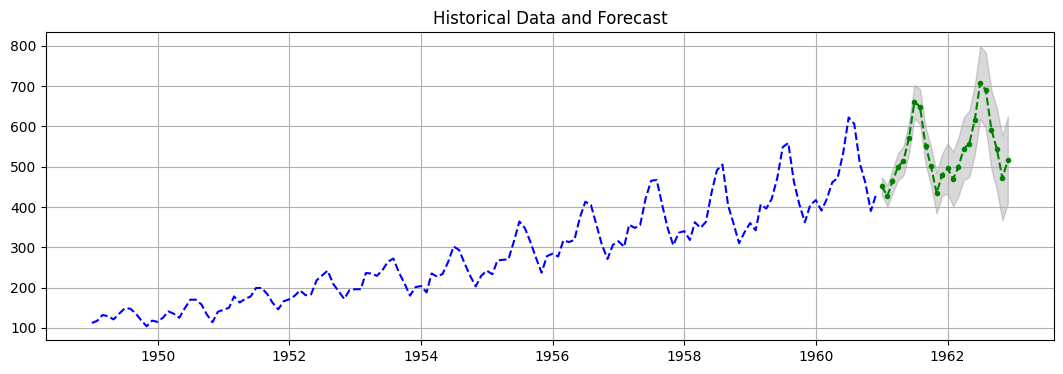

In [9]:
# SARIMAX
SARIMAX_model = auto_sarimax(data, column_name)
SARIMAX_model.plot_diagnostics(figsize=(10,8));
fitted_series, lower_series, upper_series = forecast(data=data,
                                                     column_name=column_name,
                                                     model=SARIMAX_model,
                                                     exogenous=data.index.month)
plot_forecast(data, column_name, fitted_series, lower_series, upper_series)